In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 100
df = import_data(grid_size)

# Conduct in-sample validation over all data

In [3]:
predict_quant = 'lst'
in_sample_regression(df, grid_size, predict_quant)

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


<Figure size 432x288 with 0 Axes>

In [4]:
# import data
loss = pd.read_csv('data/regression/insample_results_{}.csv'.format(grid_size))

In [5]:
loss = loss.dropna()

In [6]:
loss = loss.replace({'diurnal':'day\n(mean)','diurnalmax':'day\n(max)','nocturnal':'night\n(mean)','nocturnalmax':'night\n(max)'})

In [7]:
# plot_holdouts(loss, grid_size)

# Plot the in-sample vs mean out-of-sample metrics

In [12]:
# import the in-sample results
insample = pd.read_csv('data/regression/insample_results_{}.csv'.format(grid_size))
insample = insample.dropna()
# import the OOB results
path = 'data/regression/holdout_{}'.format(grid_size)                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
outofsample = pd.concat(df_from_each_file, ignore_index=True)
outofsample = outofsample.dropna()



In [20]:
oob = pd.DataFrame(outofsample.groupby(['error_metric','model','time_of_day'])['error'].mean())
oob = oob.rename(index=str, columns={"error": "out of sample"})
oob.head()

out of sample
error_metric model   time_of_day                
mae          average diurnal            4.018570
                     diurnalmax         3.612021
                     nocturnal          2.236587
                     nocturnalmax       1.938336
             cnn     diurnal            0.989723

In [36]:
itb = pd.DataFrame(insample.groupby(['error_metric','model','time_of_day'])['error'].mean())
itb = itb.rename(index=str, columns={"error": "in sample"})
itb.head()

in sample
error_metric model   time_of_day            
mae          average diurnal        4.023760
                     diurnalmax     3.582845
                     nocturnal      2.235281
                     nocturnalmax   1.928170
             gam     diurnal        1.560583

In [45]:
compare = oob.join(itb)
compare.reset_index(inplace=True)
compare.head()

,error_metric,model,time_of_day,out of sample,in sample
0,mae,average,diurnal,4.018570,4.023760
1,mae,average,diurnalmax,3.612021,3.582845
2,mae,average,nocturnal,2.236587,2.235281
3,mae,average,nocturnalmax,1.938336,1.928170
4,mae,cnn,diurnal,0.989723,NaN


In [38]:
compare_r2 = compare.loc['r2']

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = model.

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


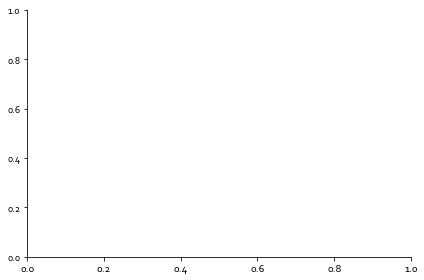

In [46]:
compare.plot.scatter(x='in sample',y='out of sample', c='model',by='error_metric')

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


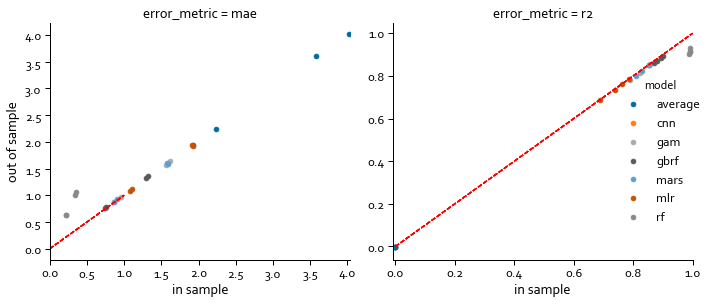

In [66]:
   
font_scale = 1.5#1.75
with sns.plotting_context("paper", font_scale=font_scale):
# sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":font_size,"axes.labelsize":font_size})
# plt.figure(figsize=(width_2col, height_2c))
    g = sns.FacetGrid(compare, col="error_metric", hue = 'model',
                        sharey=False, sharex=False,
                        height = height_2c,
                        aspect = 1
                        )
    g = g.map(plt.scatter, 'in sample', 'out of sample')
#     g = g.axes[0][0].map_dataframe(plt.plot, [0,5], [0,5], 'r--').add_legend().set_axis_labels("in sample", "out of sample")
    g = g.map_dataframe(plt.plot, [0,1], [0,1], '--', color='red').add_legend().set_axis_labels("in sample", "out of sample")


In [63]:
g.axes[0][0]